making a model to analyse social meadia ads and finding which segment of the customers is more likely to buy the product

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv('Social_Network_Ads.csv')

In [75]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [76]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [79]:
plt.style.available[20:]

['seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

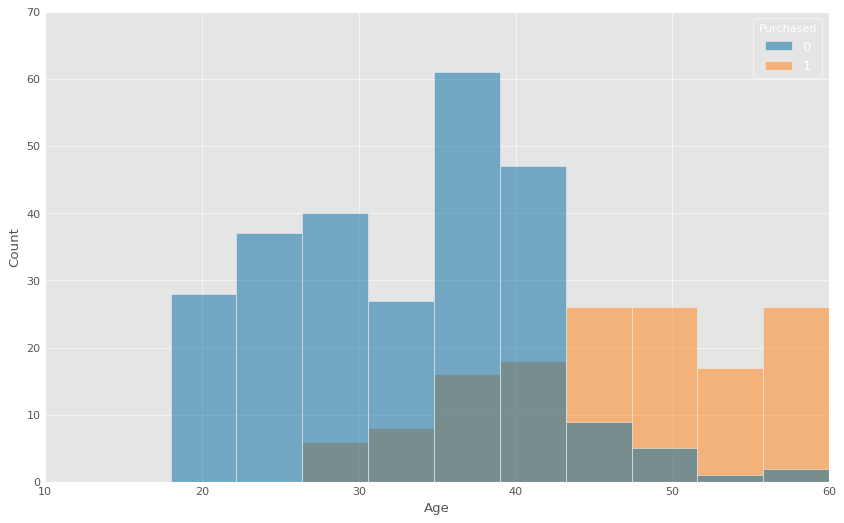

In [80]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,6))
sns.histplot(x='Age',data=df,hue='Purchased')
plt.show()

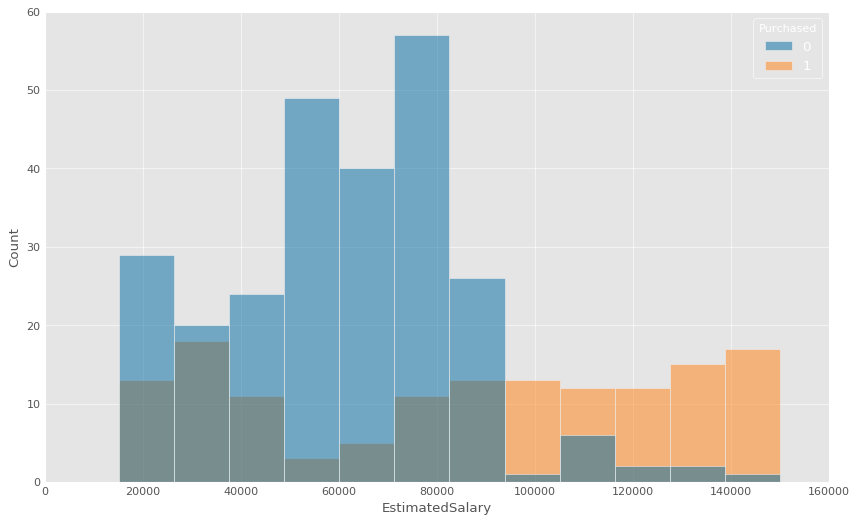

In [81]:
plt.figure(figsize=(10,6))
sns.histplot(x='EstimatedSalary',data=df,hue='Purchased')
plt.show()

In [82]:
df=df.drop('User ID',axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [91]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [94]:
categorical_features = ['Gender']  
numerical_features = ['EstimatedSalary', 'Age']

In [95]:
X= df.drop("Purchased",axis=1)
y=df['Purchased']

In [96]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)  
    ])

In [97]:
classifiers = {
    'Decision Tree': (DecisionTreeClassifier(), {'classifier__max_depth': [3, 5, 7]}),
    'Random Forest': (RandomForestClassifier(), {'classifier__n_estimators': [50, 100, 150]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'classifier__n_estimators': [50, 100, 150]}),
    'Support Vector Machine': (SVC(), {'classifier__C': [0.1, 1, 10], 'classifier__gamma': ['scale', 'auto']})
}


In [98]:
for clf_name, (clf, param_grid) in classifiers.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_
best_estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['EstimatedSalary', 'Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender'])])),
                ('classifier', SVC(C=10))])

In [104]:
y_pred = best_estimator.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [108]:
print("accuracy_score",accuracy_score(y_test,y_pred))

accuracy_score 0.925


In [105]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'scale'}
